In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [134]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [135]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [136]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868247 entries, 0 to 1868246
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Interval  int64  
 1   kWh       float64
dtypes: float64(1), int64(1)
memory usage: 28.5 MB


In [137]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1868242    0.25
1868243    0.25
1868244    0.25
1868245    0.24
1868246    0.26
Name: kWh, Length: 1868247, dtype: float64

In [138]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1868242    0.25
1868243    0.25
1868244    0.25
1868245    0.24
1868246    0.26
Name: kWh, Length: 1868247, dtype: float64

In [139]:
l=len(conso_data)-1
l

1868246

In [140]:
conso_data['sec']=conso_data['Interval']/1000


In [141]:
conso_data['Wh']=3600000/conso_data['Interval']


In [142]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [143]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868247 entries, 0 to 1868246
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Interval   int64  
 1   kWh        float64
 2   sec        float64
 3   Wh         float64
 4   cumul(ms)  int64  
dtypes: float64(3), int64(2)
memory usage: 71.3 MB


In [144]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1868242,14647,0.25,14.647,245.784120,45882573648
1868243,14673,0.25,14.673,245.348599,45882588321
1868244,14620,0.25,14.620,246.238030,45882602941
1868245,14718,0.24,14.718,244.598451,45882617659
1868246,13730,0.26,13.730,262.199563,45882631389


In [145]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

45882631389000

In [146]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 21, 3, 9, 728673)

In [147]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [148]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [149]:
base

datetime.datetime(2023, 8, 21, 21, 3, 9, 728673)

In [150]:
# create column 'dates' with time cumulated time from base
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['dates']

0         2023-08-21 21:03:31.662673
1         2023-08-21 21:03:53.520673
2         2023-08-21 21:04:15.521673
3         2023-08-21 21:04:37.449673
4         2023-08-21 21:04:59.340673
                     ...            
1868242   2025-02-02 22:12:43.376673
1868243   2025-02-02 22:12:58.049673
1868244   2025-02-02 22:13:12.669673
1868245   2025-02-02 22:13:27.387673
1868246   2025-02-02 22:13:41.117673
Name: dates, Length: 1868247, dtype: datetime64[ns]

## créer les dates

In [151]:
# create column 'days' avec format 'dd/mm/yy'
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 21:03:31.662673,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 21:03:53.520673,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 21:04:15.521673,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 21:04:37.449673,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 21:04:59.340673,21/08/23
...,...,...,...,...,...,...,...
1868242,14647,0.25,14.647,245.784120,45882573648,2025-02-02 22:12:43.376673,02/02/25
1868243,14673,0.25,14.673,245.348599,45882588321,2025-02-02 22:12:58.049673,02/02/25
1868244,14620,0.25,14.620,246.238030,45882602941,2025-02-02 22:13:12.669673,02/02/25
1868245,14718,0.24,14.718,244.598451,45882617659,2025-02-02 22:13:27.387673,02/02/25


### save conso_data with dates

In [152]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [153]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('02/02/25', 2, 2, 2025)

In [154]:
here = now.strftime('%H:%M:%S')
here

'22:14:10'

In [155]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [156]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3566 entries, 1864681 to 1868246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3566 non-null   int64         
 1   kWh        3566 non-null   float64       
 2   sec        3566 non-null   float64       
 3   Wh         3566 non-null   float64       
 4   cumul(ms)  3566 non-null   int64         
 5   dates      3566 non-null   datetime64[ns]
 6   days       3566 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 222.9+ KB


In [157]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [158]:
data = list(df_grp['kWh'])
print(data)

[0.579, 3.701, 4.237, 3.678, 3.967, 4.604, 3.712, 3.453, 3.503, 3.704, 3.453, 4.109, 4.236, 3.664, 3.624, 3.638, 3.32, 3.373, 4.06, 4.051, 4.016, 4.09, 3.506, 4.258, 3.943, 3.749, 4.119, 4.634, 4.113, 3.213, 3.172, 3.875, 3.8, 3.088, 3.787, 4.16, 3.623, 3.718, 4.59, 4.287, 4.438, 3.893, 3.446, 4.265, 3.911, 3.794, 3.53, 3.968, 3.746, 3.446, 4.129, 3.386, 3.833, 3.883, 3.606, 3.749, 4.303, 3.257, 3.877, 3.146, 2.055, 2.042, 2.311, 4.077, 3.649, 4.307, 3.631, 3.983, 3.772, 3.696, 4.214, 3.971, 3.789, 3.125, 3.769, 3.587, 3.546, 3.714, 3.674, 3.336, 3.814, 3.258, 3.748, 3.608, 4.061, 3.564, 3.526, 3.681, 4.109, 4.337, 3.933, 4.144, 4.266, 3.82, 3.888, 3.82, 3.789, 3.82, 4.073, 4.411, 3.871, 3.507, 3.68, 3.671, 3.353, 3.836, 3.789, 4.31, 3.527, 4.159, 3.599, 3.903, 4.673, 3.6, 3.572, 3.525, 3.983, 3.839, 4.163, 3.841, 3.843, 3.622, 5.068, 3.757, 3.676, 4.278, 4.204, 4.379, 4.495, 4.14, 3.652, 4.464, 4.707, 4.118, 4.753, 4.476, 3.66, 4.058, 3.89, 3.616, 3.567, 3.958, 3.661, 3.723, 3.628, 3.

In [159]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [160]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [161]:
df = conso_data
len(df)

1868247

In [162]:
period(p=2)

2023-08-22 03:09:45.465673	2023-08-22 10:14:01.085673	7h 4m 15s 	2000


In [163]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.298973
dtype: float64

In [164]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.511742
dtype: float64

In [165]:
last=df_grp.iloc[-1]['kWh']
last

3.566

In [166]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3566 entries, 1864681 to 1868246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3566 non-null   int64         
 1   kWh        3566 non-null   float64       
 2   sec        3566 non-null   float64       
 3   Wh         3566 non-null   float64       
 4   cumul(ms)  3566 non-null   int64         
 5   dates      3566 non-null   datetime64[ns]
 6   days       3566 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 222.9+ KB


In [167]:
# select day
day = today
#day = '16/08/24'


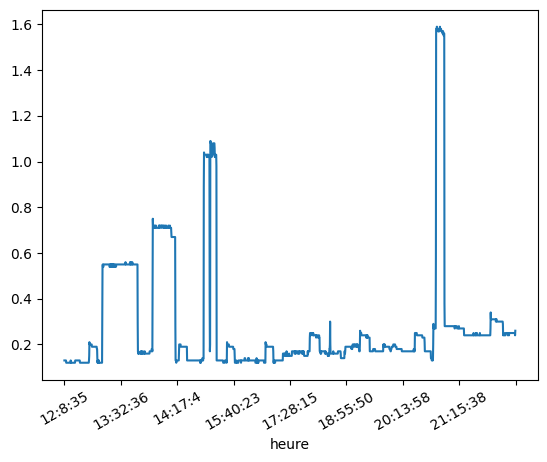

In [168]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [169]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 21:03:31.662673,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 21:03:53.520673,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 21:04:15.521673,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 21:04:37.449673,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 21:04:59.340673,21/08/23
...,...,...,...,...,...,...,...
1868242,14647,0.25,14.647,245.784120,45882573648,2025-02-02 22:12:43.376673,02/02/25
1868243,14673,0.25,14.673,245.348599,45882588321,2025-02-02 22:12:58.049673,02/02/25
1868244,14620,0.25,14.620,246.238030,45882602941,2025-02-02 22:13:12.669673,02/02/25
1868245,14718,0.24,14.718,244.598451,45882617659,2025-02-02 22:13:27.387673,02/02/25


In [170]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:9,21524,0.17,21.524,167.255157,45802619949,2025-02-02 00:00:09.677673,02/02/25
0:0:31,21851,0.16,21.851,164.752185,45802641800,2025-02-02 00:00:31.528673,02/02/25
0:0:53,21754,0.17,21.754,165.486807,45802663554,2025-02-02 00:00:53.282673,02/02/25
0:1:13,20293,0.18,20.293,177.401074,45802683847,2025-02-02 00:01:13.575673,02/02/25
0:1:34,20637,0.17,20.637,174.443960,45802704484,2025-02-02 00:01:34.212673,02/02/25
...,...,...,...,...,...,...,...
22:12:43,14647,0.25,14.647,245.784120,45882573648,2025-02-02 22:12:43.376673,02/02/25
22:12:58,14673,0.25,14.673,245.348599,45882588321,2025-02-02 22:12:58.049673,02/02/25
22:13:12,14620,0.25,14.620,246.238030,45882602941,2025-02-02 22:13:12.669673,02/02/25


In [171]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 22/01/25 4.784
Min : 31/01/25 2.819


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1864681,21524,0.17,21.524,167.255157,45802619949,2025-02-02 00:00:09.677673,02/02/25,0:0:9
1864682,21851,0.16,21.851,164.752185,45802641800,2025-02-02 00:00:31.528673,02/02/25,0:0:31
1864683,21754,0.17,21.754,165.486807,45802663554,2025-02-02 00:00:53.282673,02/02/25,0:0:53
1864684,20293,0.18,20.293,177.401074,45802683847,2025-02-02 00:01:13.575673,02/02/25,0:1:13
1864685,20637,0.17,20.637,174.443960,45802704484,2025-02-02 00:01:34.212673,02/02/25,0:1:34
...,...,...,...,...,...,...,...,...
1868242,14647,0.25,14.647,245.784120,45882573648,2025-02-02 22:12:43.376673,02/02/25,22:12:43
1868243,14673,0.25,14.673,245.348599,45882588321,2025-02-02 22:12:58.049673,02/02/25,22:12:58
1868244,14620,0.25,14.620,246.238030,45882602941,2025-02-02 22:13:12.669673,02/02/25,22:13:12
1868245,14718,0.24,14.718,244.598451,45882617659,2025-02-02 22:13:27.387673,02/02/25,22:13:27


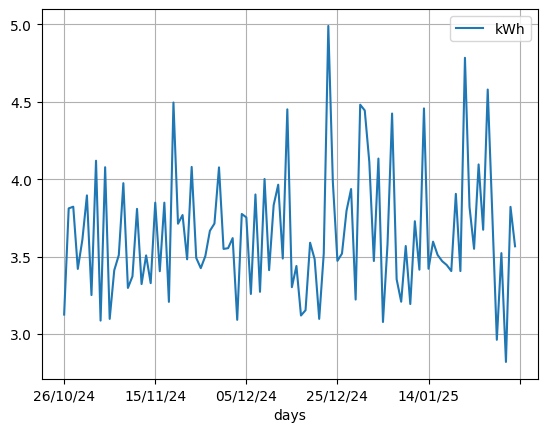

In [172]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2025-02-02 00:00:09.677673	2025-02-02 08:10:34.888673	8h 10m 25s 	1000
2025-02-02 08:10:34.888673	2025-02-02 14:08:07.083673	5h 57m 32s 	2000
2025-02-02 14:08:07.083673	2025-02-02 19:52:17.566673	5h 44m 10s 	3000
2025-02-02 19:52:17.566673	2025-02-02 22:13:41.117673	2h 21m 23s 	566
<class 'pandas.core.frame.DataFrame'>
Index: 3566 entries, 1864681 to 1868246
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3566 non-null   int64         
 1   kWh        3566 non-null   float64       
 2   sec        3566 non-null   float64       
 3   Wh         3566 non-null   float64       
 4   cumul(ms)  3566 non-null   int64         
 5   dates      3566 non-null   datetime64[ns]
 6   days       3566 non-null   object        
 7   heure      3566 non-null   object        
 8   hours      3566 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 278.6+ KB


('02/02/25', <Axes: xlabel='hours'>)

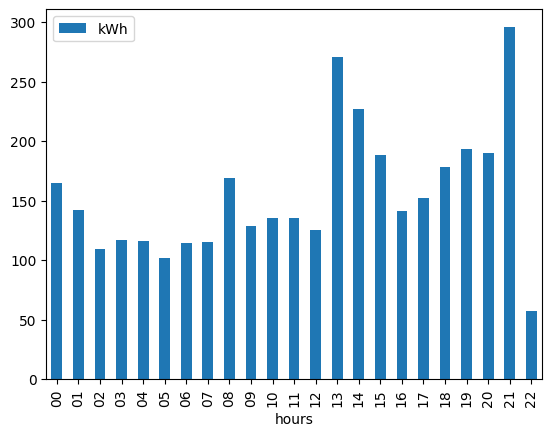

In [173]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [174]:
df_grp

,kWh
days,
21/08/23,0.579
22/08/23,3.701
23/08/23,4.237
24/08/23,3.678
25/08/23,3.967
...,...
29/01/25,2.962
30/01/25,3.522
31/01/25,2.819


In [175]:
# select number of days to display
span = 30
#df_grp.tail(span)


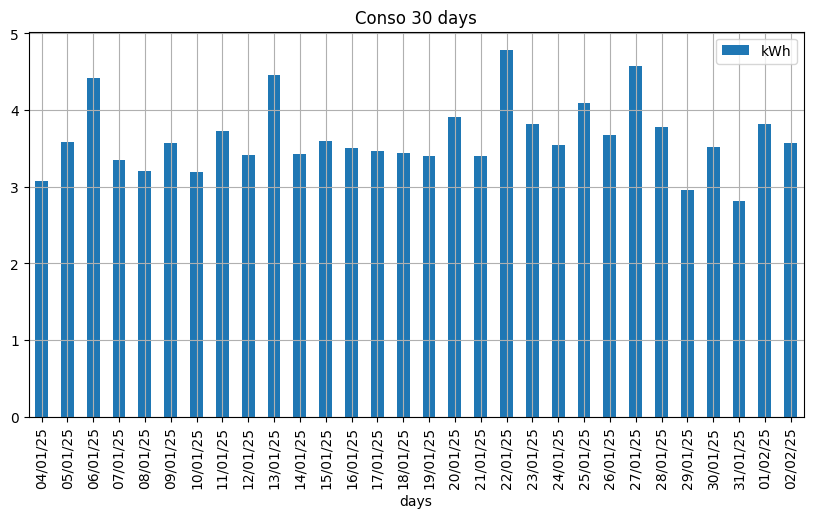

In [176]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


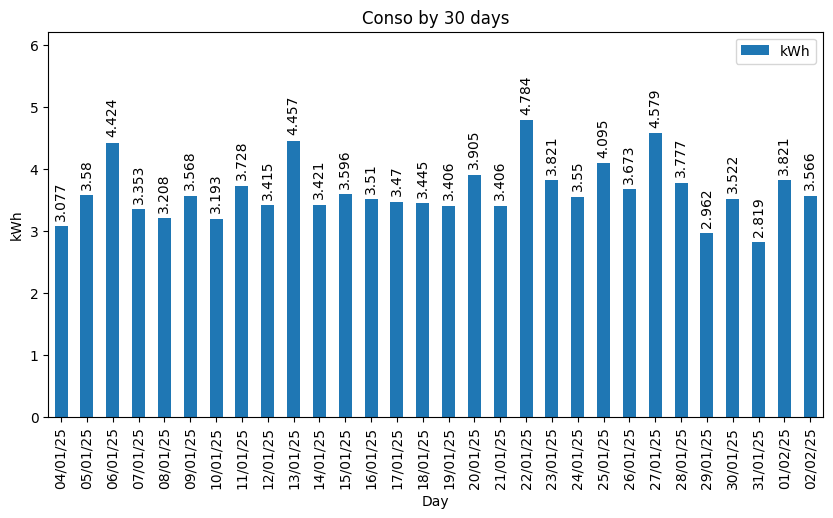

In [177]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [178]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
04/01/25    3.077
05/01/25    3.580
06/01/25    4.424
07/01/25    3.353
08/01/25    3.208
09/01/25    3.568
10/01/25    3.193
11/01/25    3.728
12/01/25    3.415
13/01/25    4.457
14/01/25    3.421
15/01/25    3.596
16/01/25    3.510
17/01/25    3.470
18/01/25    3.445
19/01/25    3.406
20/01/25    3.905
21/01/25    3.406
22/01/25    4.784
23/01/25    3.821
24/01/25    3.550
25/01/25    4.095
26/01/25    3.673
27/01/25    4.579
28/01/25    3.777
29/01/25    2.962
30/01/25    3.522
31/01/25    2.819
01/02/25    3.821
02/02/25    3.566
Name: kWh, dtype: float64

In [179]:
x_labels=df_grp.tail(span).index
x_labels

Index(['04/01/25', '05/01/25', '06/01/25', '07/01/25', '08/01/25', '09/01/25',
       '10/01/25', '11/01/25', '12/01/25', '13/01/25', '14/01/25', '15/01/25',
       '16/01/25', '17/01/25', '18/01/25', '19/01/25', '20/01/25', '21/01/25',
       '22/01/25', '23/01/25', '24/01/25', '25/01/25', '26/01/25', '27/01/25',
       '28/01/25', '29/01/25', '30/01/25', '31/01/25', '01/02/25', '02/02/25'],
      dtype='object', name='days')

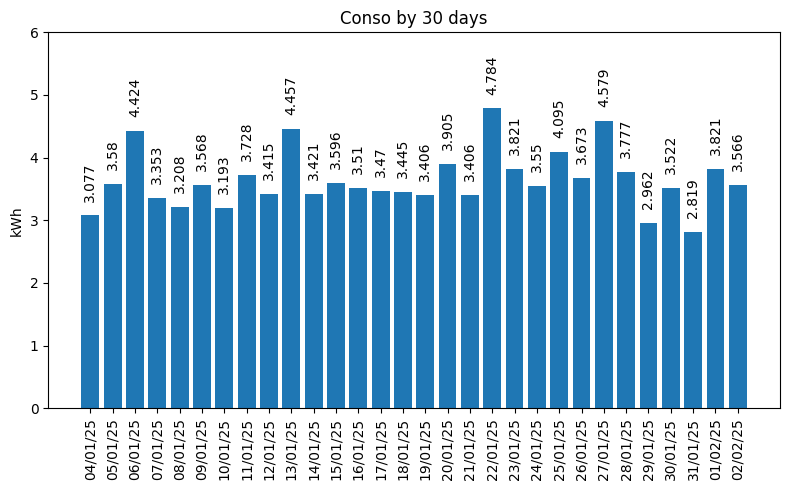

In [180]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [181]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

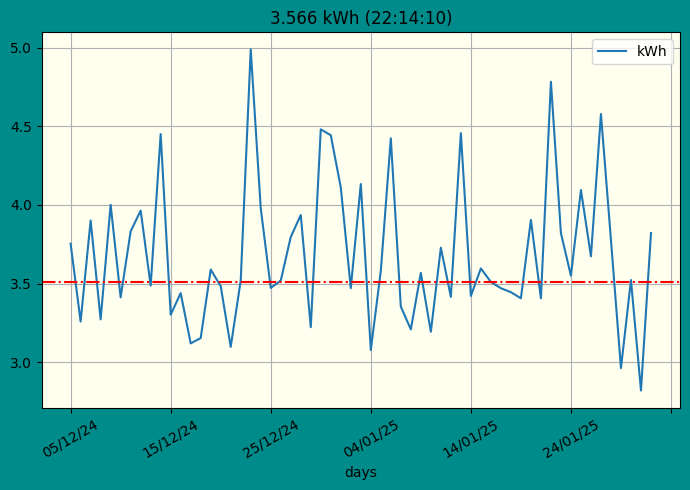

In [182]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

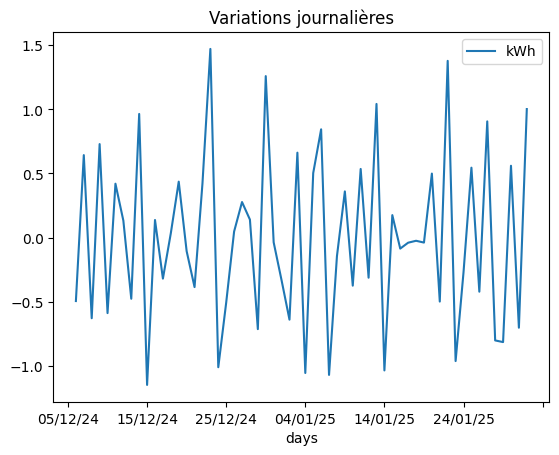

In [183]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [184]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 21:03:31.662673,21/08/23,21
1,21858,0.16,21.858,164.699424,43792,2023-08-21 21:03:53.520673,21/08/23,21
2,22001,0.16,22.001,163.628926,65793,2023-08-21 21:04:15.521673,21/08/23,21
3,21928,0.16,21.928,164.173659,87721,2023-08-21 21:04:37.449673,21/08/23,21
4,21891,0.16,21.891,164.451144,109612,2023-08-21 21:04:59.340673,21/08/23,21
...,...,...,...,...,...,...,...,...
1868242,14647,0.25,14.647,245.784120,45882573648,2025-02-02 22:12:43.376673,02/02/25,22
1868243,14673,0.25,14.673,245.348599,45882588321,2025-02-02 22:12:58.049673,02/02/25,22
1868244,14620,0.25,14.620,246.238030,45882602941,2025-02-02 22:13:12.669673,02/02/25,22
1868245,14718,0.24,14.718,244.598451,45882617659,2025-02-02 22:13:27.387673,02/02/25,22


In [185]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [186]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [187]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [188]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,579
22/08/23,3701
23/08/23,4237
24/08/23,3678
25/08/23,3967
...,...
29/01/25,2962
30/01/25,3522
31/01/25,2819


In [190]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 21:03:31.662673,21/08/23,21
1,21858,0.16,21.858,164.699424,43792,2023-08-21 21:03:53.520673,21/08/23,21
2,22001,0.16,22.001,163.628926,65793,2023-08-21 21:04:15.521673,21/08/23,21
3,21928,0.16,21.928,164.173659,87721,2023-08-21 21:04:37.449673,21/08/23,21
4,21891,0.16,21.891,164.451144,109612,2023-08-21 21:04:59.340673,21/08/23,21
...,...,...,...,...,...,...,...,...
1868242,14647,0.25,14.647,245.784120,45882573648,2025-02-02 22:12:43.376673,02/02/25,22
1868243,14673,0.25,14.673,245.348599,45882588321,2025-02-02 22:12:58.049673,02/02/25,22
1868244,14620,0.25,14.620,246.238030,45882602941,2025-02-02 22:13:12.669673,02/02/25,22
1868245,14718,0.24,14.718,244.598451,45882617659,2025-02-02 22:13:27.387673,02/02/25,22


In [191]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 21    0        21/08/23    21  0.16
               1        21/08/23    21  0.16
               2        21/08/23    21  0.16
               3        21/08/23    21  0.16
               4        21/08/23    21  0.16
...                          ...   ...   ...
02/02/25 22    1868242  02/02/25    22  0.25
               1868243  02/02/25    22  0.25
               1868244  02/02/25    22  0.25
               1868245  02/02/25    22  0.24
               1868246  02/02/25    22  0.26

[1868247 rows x 3 columns]

In [192]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [193]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('22/08/23', '19'), ('22/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/23', '15'), ('23/08/23', '16'), ('23/08/23', '17'), ('23/08/23', '18'), ('23/08/2

In [194]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,579,579
22/08/23,3701,3701
23/08/23,4237,4237
24/08/23,3678,3678
25/08/23,3967,3967
...,...,...
29/01/25,2962,2962
30/01/25,3522,3522
31/01/25,2819,2819


In [195]:
grp_by_day['kWh'].cumsum()

days
21/08/23        579
22/08/23       4280
23/08/23       8517
24/08/23      12195
25/08/23      16162
             ...   
29/01/25    1854519
30/01/25    1858041
31/01/25    1860860
01/02/25    1864681
02/02/25    1868247
Name: kWh, Length: 532, dtype: int64

In [196]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 21     166
         22     283
         23     130
22/08/23 00     129
         01     131
...             ...
02/02/25 18     178
         19     193
         20     190
         21     296
         22      57

[12746 rows x 1 columns]

In [197]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  21           166
          22           449
          23           579
22/08/23  00           708
          01           839
                    ...   
02/02/25  18       1867511
          19       1867704
          20       1867894
          21       1868190
          22       1868247
Name: kWh, Length: 12746, dtype: int64

In [198]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 21     166     166    NaN
         22     283     449  117.0
         23     130     579 -153.0
22/08/23 00     129     129    NaN
         01     131     260    2.0
...             ...     ...    ...
02/02/25 18     178    2830   26.0
         19     193    3023   15.0
         20     190    3213   -3.0
         21     296    3509  106.0
         22      57    3566 -239.0

[12746 rows x 3 columns]

In [199]:
today, grp_by_dayhours.loc[today]

('02/02/25',
        kWh  cumsum   diff
 hours                    
 00     165     165    NaN
 01     142     307  -23.0
 02     109     416  -33.0
 03     117     533    8.0
 04     116     649   -1.0
 05     102     751  -14.0
 06     114     865   12.0
 07     115     980    1.0
 08     169    1149   54.0
 09     129    1278  -40.0
 10     135    1413    6.0
 11     135    1548    0.0
 12     125    1673  -10.0
 13     271    1944  146.0
 14     227    2171  -44.0
 15     188    2359  -39.0
 16     141    2500  -47.0
 17     152    2652   11.0
 18     178    2830   26.0
 19     193    3023   15.0
 20     190    3213   -3.0
 21     296    3509  106.0
 22      57    3566 -239.0)

Text(0.5, 1.0, 'Cumul journalier')

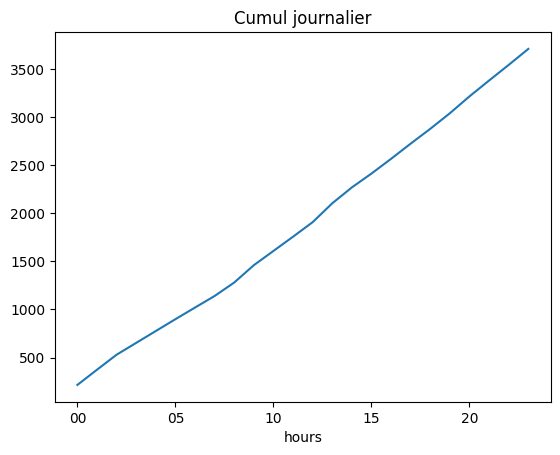

In [200]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

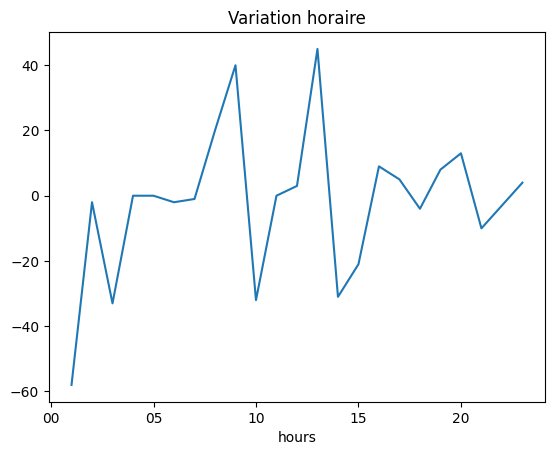

In [201]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [202]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

532

In [203]:
df_grp.tail(n)['kWh'].describe()


count    532.000000
mean       3.511742
std        0.674640
min        0.579000
25%        3.353000
50%        3.618500
75%        3.875500
max        5.068000
Name: kWh, dtype: float64

In [204]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '532 days')

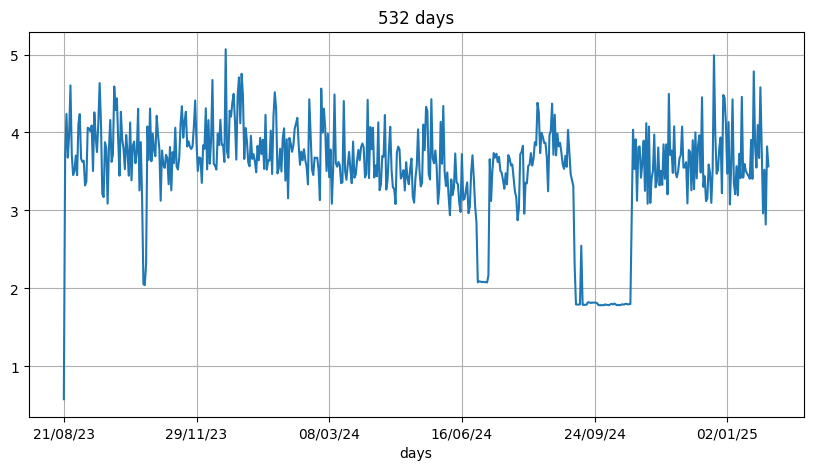

In [205]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '400 days')

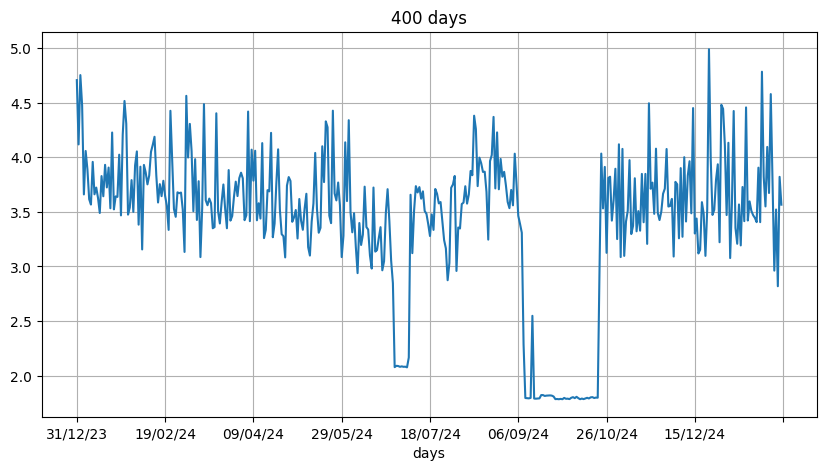

In [206]:
# show conso in span 
span = 400
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [207]:
df_grp['kWh']

days
21/08/23    0.579
22/08/23    3.701
23/08/23    4.237
24/08/23    3.678
25/08/23    3.967
            ...  
29/01/25    2.962
30/01/25    3.522
31/01/25    2.819
01/02/25    3.821
02/02/25    3.566
Name: kWh, Length: 532, dtype: float64

In [208]:
df_grp.describe()

,kWh
count,532.000000
mean,3.511742
std,0.674640
min,0.579000
25%,3.353000
50%,3.618500
75%,3.875500
max,5.068000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

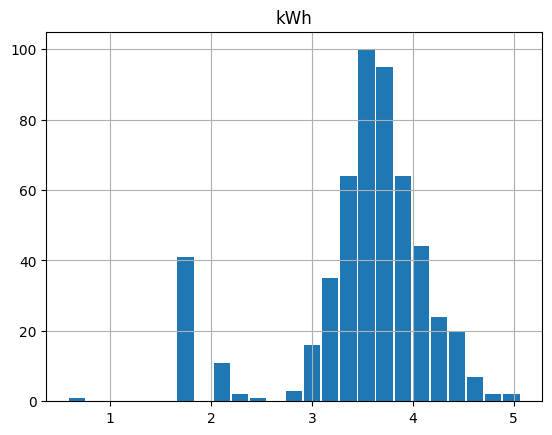

In [209]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [210]:
df_grp.tail(span)['kWh']

days
31/12/23    4.707
01/01/24    4.118
02/01/24    4.753
03/01/24    4.476
04/01/24    3.660
            ...  
29/01/25    2.962
30/01/25    3.522
31/01/25    2.819
01/02/25    3.821
02/02/25    3.566
Name: kWh, Length: 400, dtype: float64

# Conso par heure

In [211]:
day

'02/02/25'

In [212]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,165,165,NaN
01,142,307,-23.0
02,109,416,-33.0
03,117,533,8.0
04,116,649,-1.0
05,102,751,-14.0
06,114,865,12.0
07,115,980,1.0
08,169,1149,54.0


In [213]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


23

In [214]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 24)

In [215]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [216]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [217]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
22    23.0
Name: days, dtype: float64

In [218]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [219]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 00 to 22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     23 non-null     int64  
 1   cumsum  23 non-null     int64  
 2   diff    22 non-null     float64
 3   days    23 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 920.0+ bytes


In [220]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
22    23.0
Name: days, dtype: float64

In [221]:
day

'02/02/25'

In [222]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,165,165,NaN,1.0
01,142,307,-23.0,2.0
02,109,416,-33.0,3.0
03,117,533,8.0,4.0
04,116,649,-1.0,5.0
05,102,751,-14.0,6.0
06,114,865,12.0,7.0
07,115,980,1.0,8.0
08,169,1149,54.0,9.0


Text(0.5, 1.0, '02/02/25')

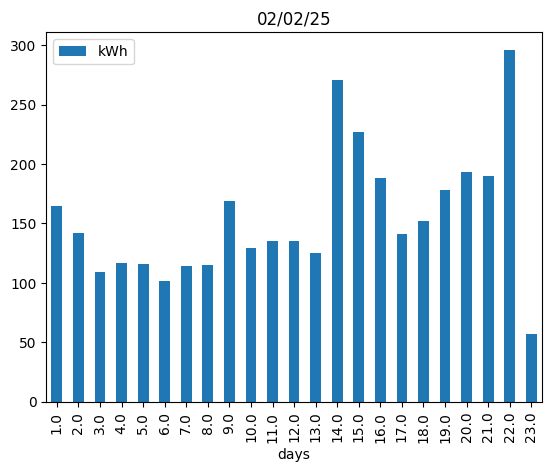

In [223]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [224]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],
      dtype='object', name='hours')

# Conso du jour


In [225]:
groupedbyhour.count()

,kWh
hours,
00,165
01,142
02,109
03,117
04,116
05,102
06,114
07,115
08,169


In [226]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    167
01    149
02    167
03    151
04    169
05    166
06    146
07    136
08    120
09    125
10    130
11    115
12    130
13    127
14    174
15    156
16    138
17    156
18    987
19    232
20    295
21    289
22    318
23    325
Name: kWh, dtype: int64

In [227]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

364.862

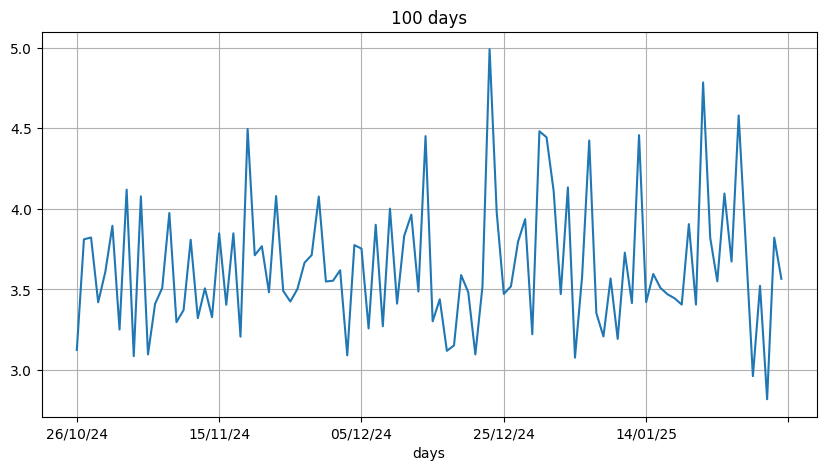

In [228]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

In [229]:
df_grp.tail(1)

,kWh
days,
02/02/25,3.566


In [230]:
span = 1
#df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
#plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

3.566

In [231]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

95.70372247695923


# Today

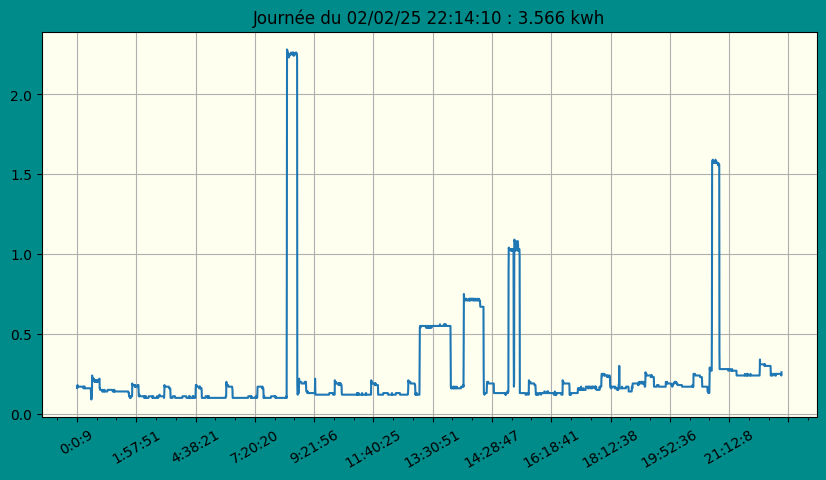

In [232]:
show(today,bgcolor='ivory')

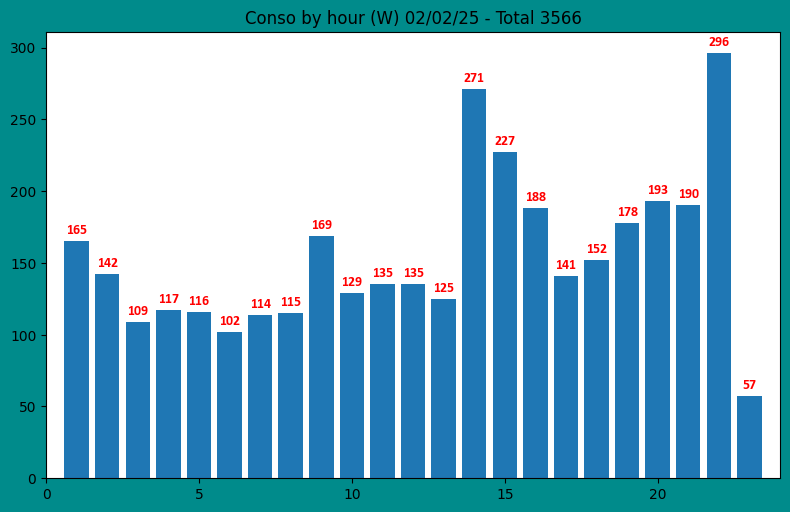

In [233]:
conso_by_hour(today)

In [234]:
day = '16/01/25'

('16/01/25', None)

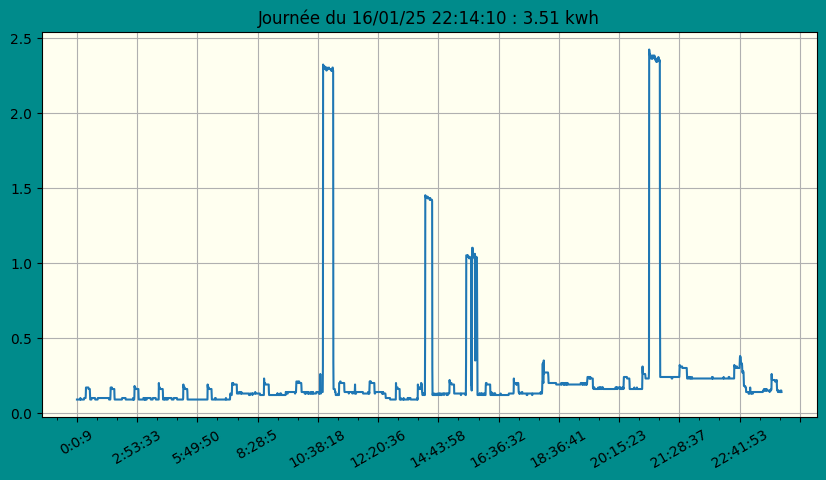

In [235]:
day, show(day,bgcolor='ivory')

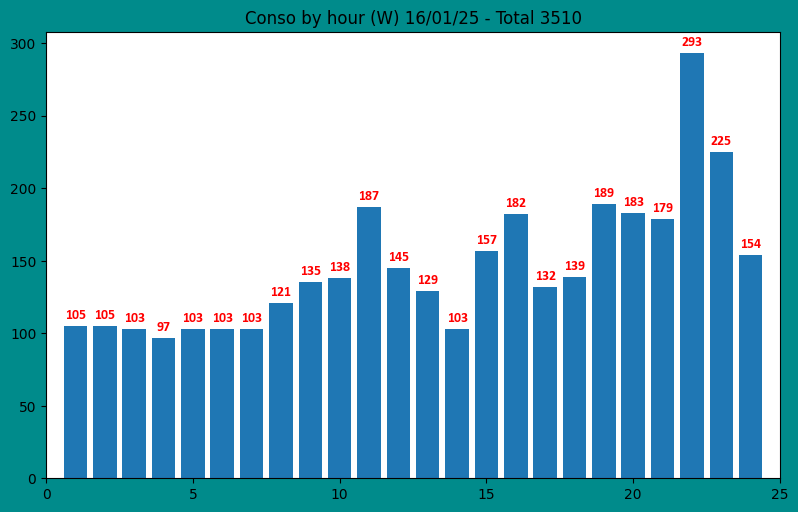

In [236]:
conso_by_hour(day)

In [237]:
maxday

'21/12/23'

('21/12/23', None)

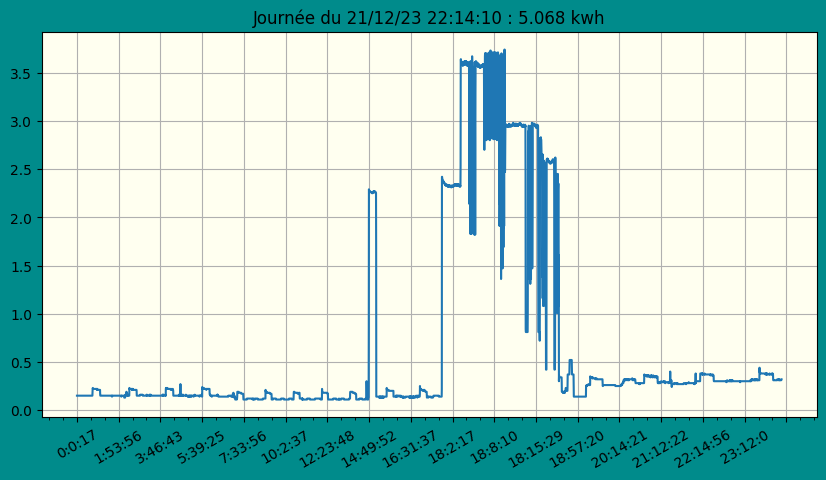

In [238]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

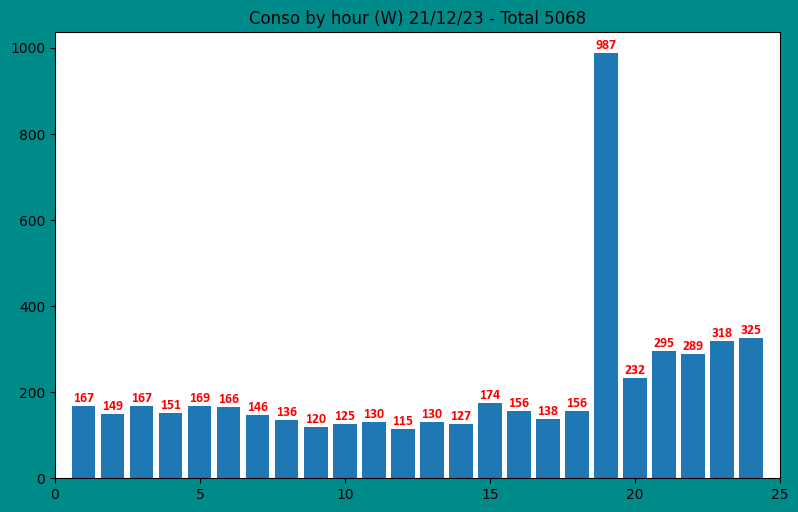

In [239]:
conso_by_hour(day)

In [240]:
sum(data)

5068

In [241]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,165,165,NaN,1.0
01,142,307,-23.0,2.0
02,109,416,-33.0,3.0
03,117,533,8.0,4.0
04,116,649,-1.0,5.0
05,102,751,-14.0,6.0
06,114,865,12.0,7.0
07,115,980,1.0,8.0
08,169,1149,54.0,9.0


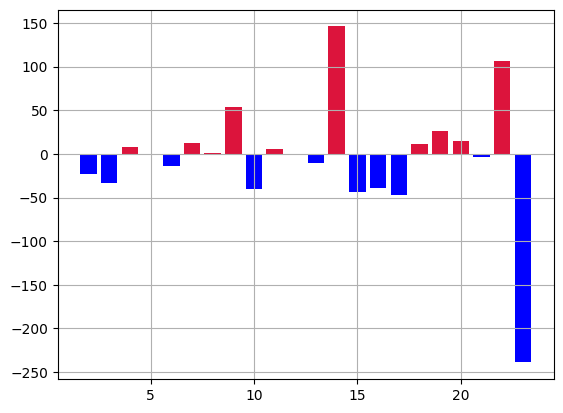

In [242]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [243]:
data

hours
00    167
01    149
02    167
03    151
04    169
05    166
06    146
07    136
08    120
09    125
10    130
11    115
12    130
13    127
14    174
15    156
16    138
17    156
18    987
19    232
20    295
21    289
22    318
23    325
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

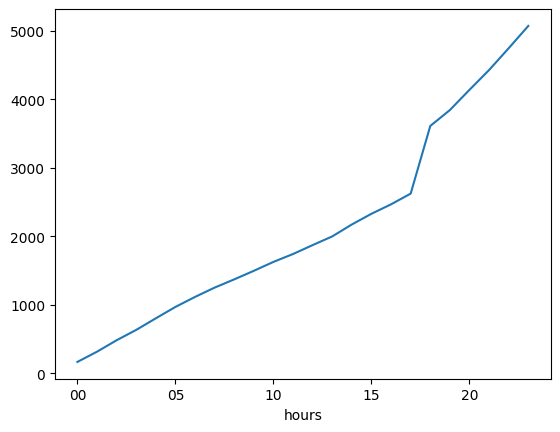

In [244]:
data.cumsum().plot()


<Axes: xlabel='hours'>

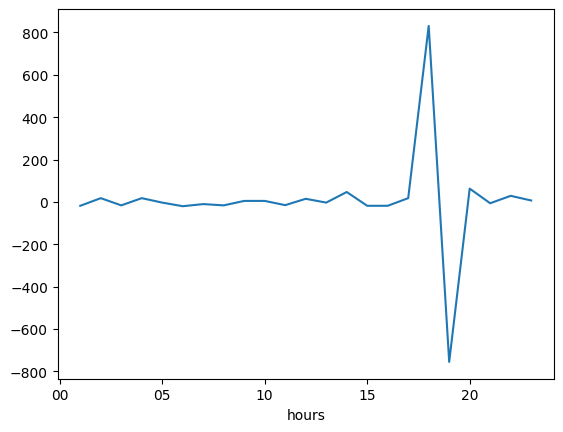

In [245]:
# evolution par heure
data.diff().plot()

In [246]:
data.diff().describe()

count     23.000000
mean       6.869565
std      240.272441
min     -755.000000
25%      -16.000000
50%       -3.000000
75%       18.000000
max      831.000000
Name: kWh, dtype: float64

<Axes: >

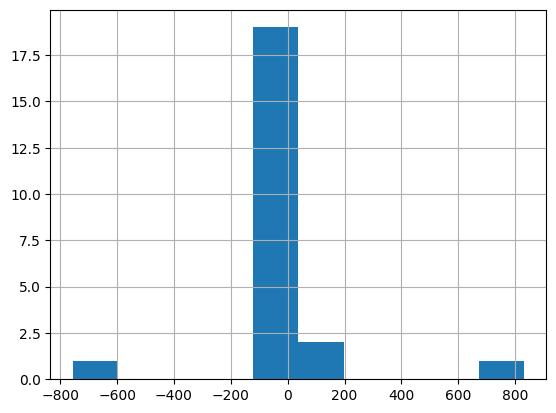

In [247]:
data.diff().hist()

# Test sauvegarde

In [248]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.git_old',
 '.ipynb_checkpoints',
 '1row.flf',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'amlich_soc_tiet.ipynb',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'average_binding_energy_by_nucleons.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb

In [249]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [250]:
#conso_byhour(day)

In [251]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


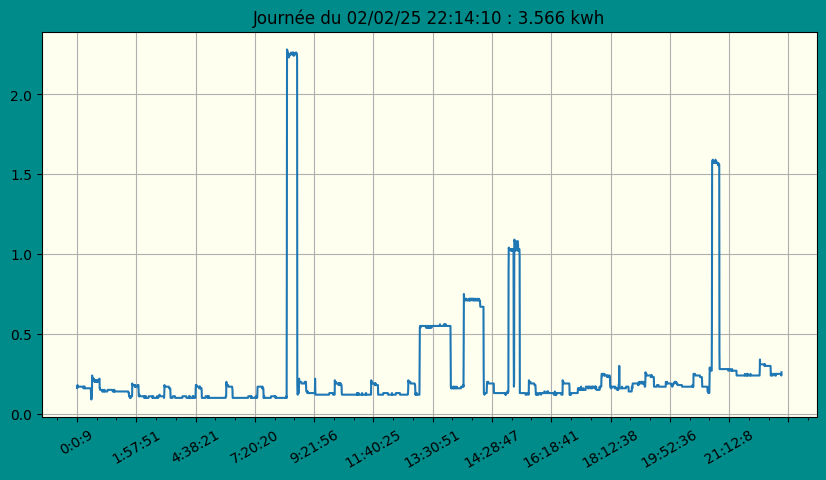

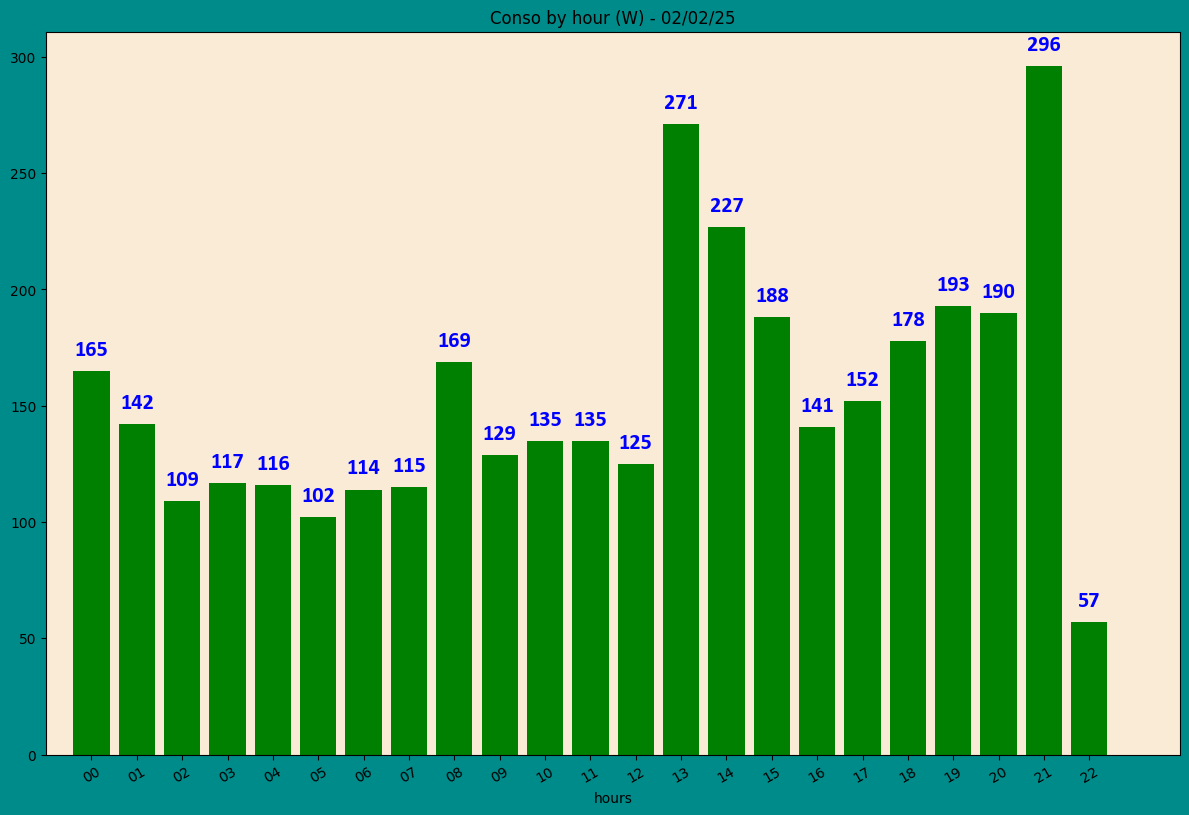

In [252]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [253]:
month.describe()


count    30.000000
mean      3.656600
std       0.466902
min       2.819000
25%       3.408250
50%       3.559000
75%       3.821000
max       4.784000
Name: kWh, dtype: float64

<Axes: >

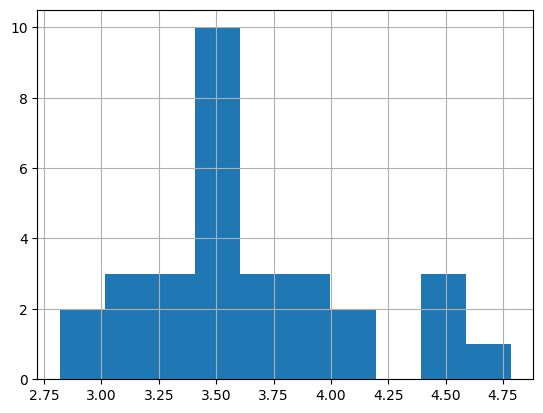

In [254]:
month.hist()

<Axes: xlabel='days'>

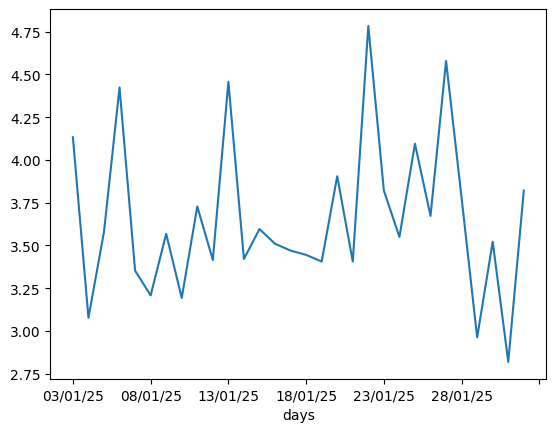

In [255]:
month.plot()

In [256]:
# date with max conso in 1 month
month.idxmax()

'22/01/25'

In [257]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'22/01/25'

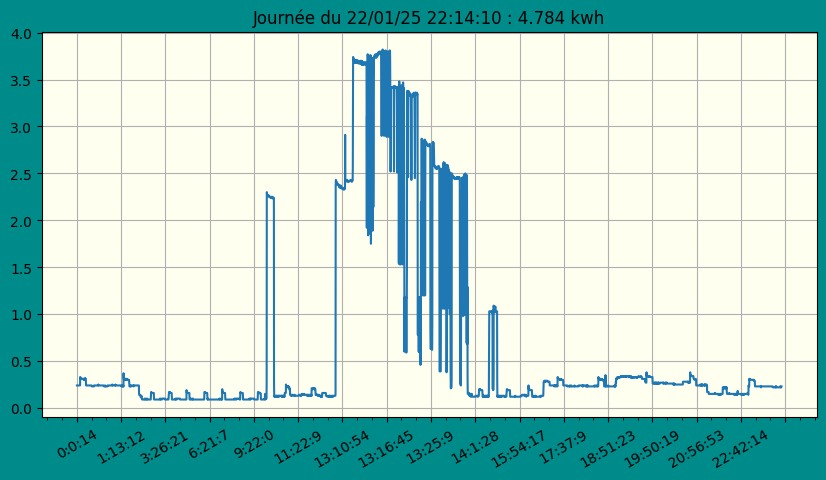

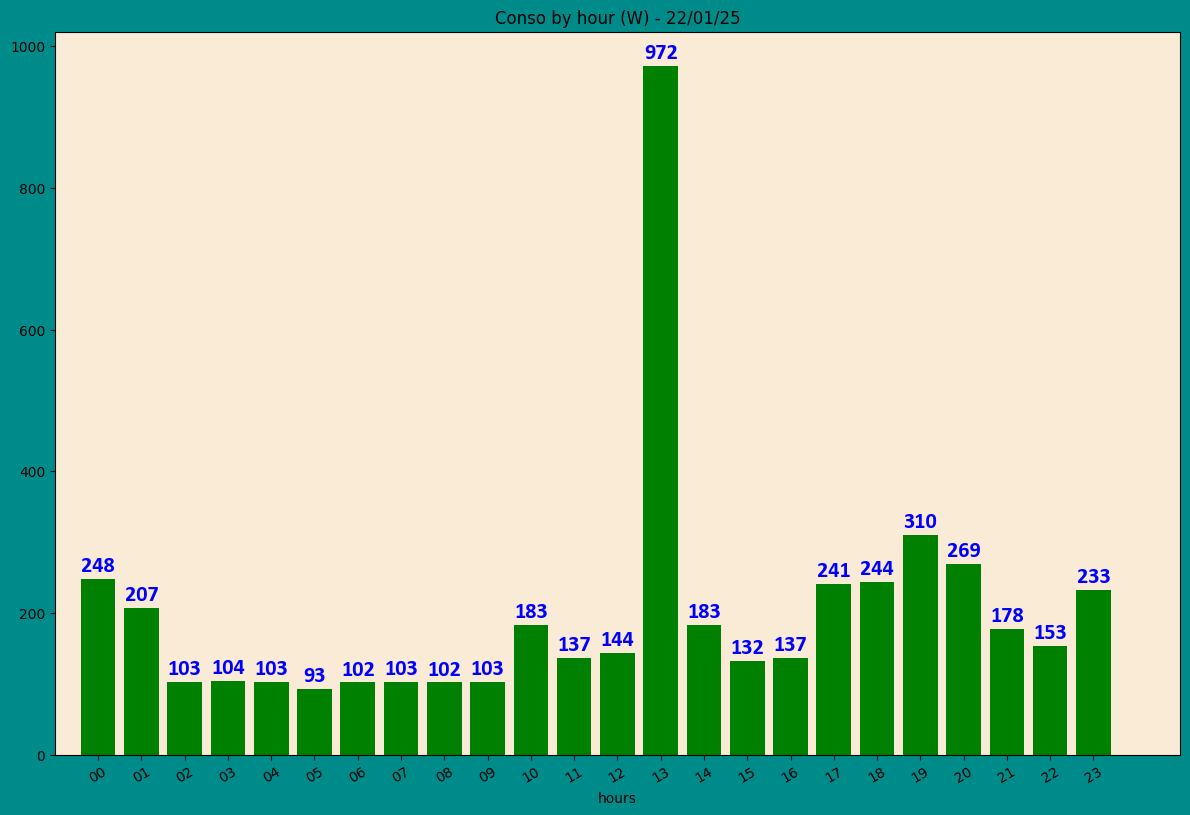

In [258]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [259]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 21     166     166    NaN   NaN
         22     283     449  117.0   NaN
         23     130     579 -153.0   NaN
22/08/23 00     129     129    NaN   NaN
         01     131     260    2.0   NaN
...             ...     ...    ...   ...
02/02/25 18     178    2830   26.0  19.0
         19     193    3023   15.0  20.0
         20     190    3213   -3.0  21.0
         21     296    3509  106.0  22.0
         22      57    3566 -239.0  23.0

[12746 rows x 4 columns]

In [260]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,248,248,NaN,NaN
01,207,455,-41.0,NaN
02,103,558,-104.0,NaN
03,104,662,1.0,NaN
04,103,765,-1.0,NaN
05,93,858,-10.0,NaN
06,102,960,9.0,NaN
07,103,1063,1.0,NaN
08,102,1165,-1.0,NaN


In [261]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

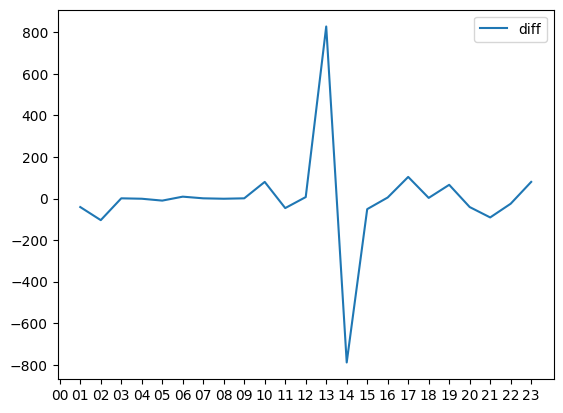

In [262]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

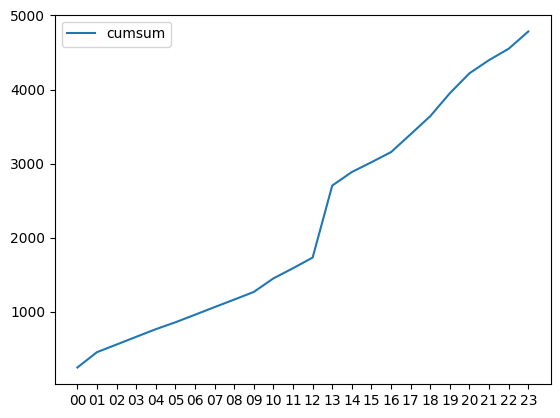

In [263]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [264]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB